# **1. Perkenalan Dataset**


Dataset **Sleep Health and Lifestyle** berasal dari public dataset [Sleep Health and Lifestyle Dataset - Kaggle](https://www.kaggle.com/datasets/uom190346a/sleep-health-and-lifestyle-dataset?utm_source=chatgpt.com)
terdiri dari 400 baris data dan 13 kolom yang mencakup berbagai variabel terkait dengan kebiasaan tidur dan gaya hidup sehari-hari. Data ini menggabungkan informasi tentang faktor-faktor yang memengaruhi kualitas tidur seseorang, kebiasaan fisik, dan kesehatan kardiovaskular. Data ini sangat berguna untuk analisis lebih lanjut tentang pola tidur, gaya hidup, dan faktor-faktor yang berhubungan dengan gangguan tidur.

<br>
Fitur Utama dalam Dataset:

1. Metrik Tidur yang Komprehensif: Meliputi durasi tidur, kualitas tidur, dan faktor-faktor yang mempengaruhi pola tidur seseorang.
2. Faktor Gaya Hidup: Analisis tingkat aktivitas fisik, stres, dan kategori BMI (Body Mass Index).
3. Kesehatan Kardiovaskular: Pengukuran tekanan darah dan detak jantung untuk menilai kesehatan jantung.
4. Analisis Gangguan Tidur: Menganalisis adanya gangguan tidur seperti insomnia dan sleep apnea.

<br>
Kolom Dataset:

1. Person ID: Identifikasi unik untuk setiap individu.
2. Gender: Jenis kelamin individu (Laki-laki/Perempuan).
3. Age: Usia individu dalam tahun.
4. Occupation: Pekerjaan atau profesi individu.
5. Sleep Duration (hours): Durasi tidur individu dalam jam per hari.
6. Quality of Sleep (scale: 1-10): Penilaian subjektif mengenai kualitas tidur, dengan skala 1 hingga 10.
7. Physical Activity Level (minutes/day): Jumlah menit yang dihabiskan individu untuk aktivitas fisik setiap harinya.
8. Stress Level (scale: 1-10): Penilaian subjektif mengenai tingkat stres yang dialami individu, dengan skala 1 hingga 10.
9. BMI Category: Kategori BMI individu (misalnya, Underweight, Normal, Overweight).
10. Blood Pressure (systolic/diastolic): Ukuran tekanan darah individu, ditunjukkan dengan tekanan sistolik atas diastolik.
11. Heart Rate (bpm): Detak jantung istirahat individu dalam denyut per menit.
12. Daily Steps: Jumlah langkah yang diambil individu setiap harinya.
13. Sleep Disorder: Kolom ini merupakan variabel target (y) yang menunjukkan adanya atau tidak adanya gangguan tidur pada individu, dengan tiga kategori:

* None: Individu tidak mengalami gangguan tidur.
* Insomnia: Individu mengalami kesulitan tidur atau tetap terjaga di malam hari, mengarah pada tidur yang tidak berkualitas.
* Sleep Apnea: Individu mengalami gangguan pernapasan saat tidur, yang menyebabkan gangguan pola tidur dan dapat mempengaruhi kesehatan.


<br>

Penjelasan Tentang Kolom **Sleep Disorder** :

Kolom **Sleep Disorder** adalah hasil yang ingin diprediksi dalam analisis ini. Dengan menganalisis faktor-faktor seperti durasi tidur, kualitas tidur, tingkat stres, dan faktor gaya hidup lainnya, dapat memprediksi apakah seseorang memiliki gangguan tidur, khususnya insomnia atau sleep apnea. Ini menjadikannya sebagai variabel target (y) dalam machine learning, yang bertujuan untuk membantu mendiagnosis atau memberikan wawasan lebih lanjut mengenai pola tidur dan faktor-faktor risiko terkait gangguan tidur.





# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from yellowbrick.classifier import ConfusionMatrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

import warnings
warnings.filterwarnings('ignore')

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [2]:
df = pd.read_csv('/content/sleep-health_life-style.csv')
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [3]:
df['Sleep Disorder'].unique()

array([nan, 'Sleep Apnea', 'Insomnia'], dtype=object)

# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [5]:
df.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


In [6]:
df.dtypes

,0
Person ID,int64
Gender,object
Age,int64
Occupation,object
Sleep Duration,float64
Quality of Sleep,int64
Physical Activity Level,int64
Stress Level,int64
BMI Category,object
Blood Pressure,object


In [7]:
df.isnull().sum()

,0
Person ID,0
Gender,0
Age,0
Occupation,0
Sleep Duration,0
Quality of Sleep,0
Physical Activity Level,0
Stress Level,0
BMI Category,0
Blood Pressure,0


tidak ada missing value pada dataset yang digunakan

In [8]:
df.duplicated().sum()

np.int64(0)

tidak ada duplicated di dataset

## Analisis Kolom Kategorical

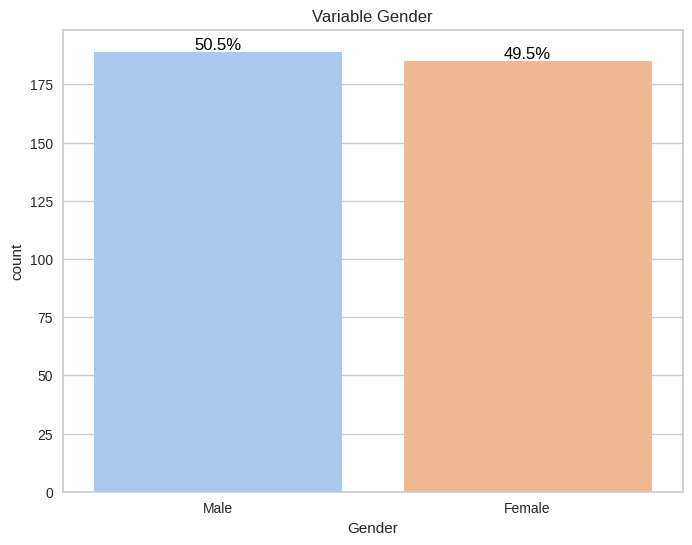

In [9]:
# eksplorasi variable gender

# Plot the countplot for Gender
plt.figure(figsize=(8, 6))
sns.countplot(x='Gender', palette='pastel', data=df)

# Calculate the total count of Gender categories
total_count = len(df)

# Annotate the plot with percentage values
ax = plt.gca()
for p in ax.patches:
    # Get the height of each bar
    height = p.get_height()
    # Calculate the percentage
    percentage = (height / total_count) * 100
    # Annotate the percentage above each bar
    ax.annotate(f'{percentage:.1f}%',
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center',
                fontsize=12, color='black',
                xytext=(0, 5), textcoords='offset points')

# Set the title of the plot
plt.gca().set_title('Variable Gender')

# Display the plot
plt.show()

Insight :

Gender nya perbandingannya hampir sama, sedikit lebih banyak laki-laki

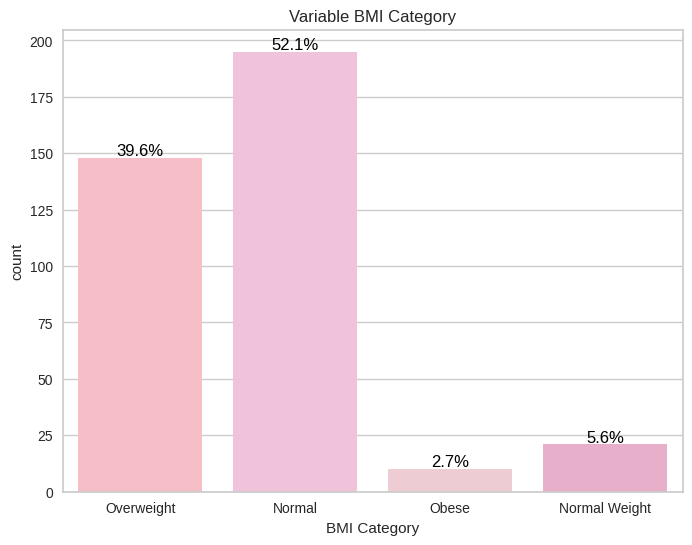

In [10]:
# eksplorasi variable BMI Category

# Membuat variabel colors untuk dipanggil, agar visualisasinya lebih menarik
# karena saya sangat menyukai warna pink jadi palet warnanya didominasi dengan warna pink
# Define a balanced custom pink-focused color palette with enough contrast
colors = sns.color_palette([
    "#FFB6C1",  # light pink
    "#F8BBDA",  # pastel pink
    "#F3C6D1",  # soft rose
    "#F0A6CA",  # warm pink
    "#FF80AB",  # pinkish red
    "#A8D8B9",  # pastel mint green (complementary)
    "#FFD1A9",  # pastel peach (complementary)
    "#C1A6FF",  # pastel lavender (complementary)
    "#B2EBF2",  # pastel blue (complementary)
    "#B7E0D1"   # pastel teal (complementary)
])

# Plot the countplot for BMI Category
plt.figure(figsize=(8, 6))
sns.countplot(x='BMI Category', palette=colors, data=df)

# Calculate the total count of BMI Category categories
total_count = len(df)

# Annotate the plot with percentage values
ax = plt.gca()
for p in ax.patches:
    # Get the height of each bar
    height = p.get_height()
    # Calculate the percentage
    percentage = (height / total_count) * 100
    # Annotate the percentage above each bar
    ax.annotate(f'{percentage:.1f}%',
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center',
                fontsize=12, color='black',
                xytext=(0, 5), textcoords='offset points')

# Set the title of the plot
plt.gca().set_title('Variable BMI Category')

# Display the plot
plt.show()

Insight:

Kategori BMI user terbanyak normal, tetapi untuk overweight persentase nya tergolong banyak

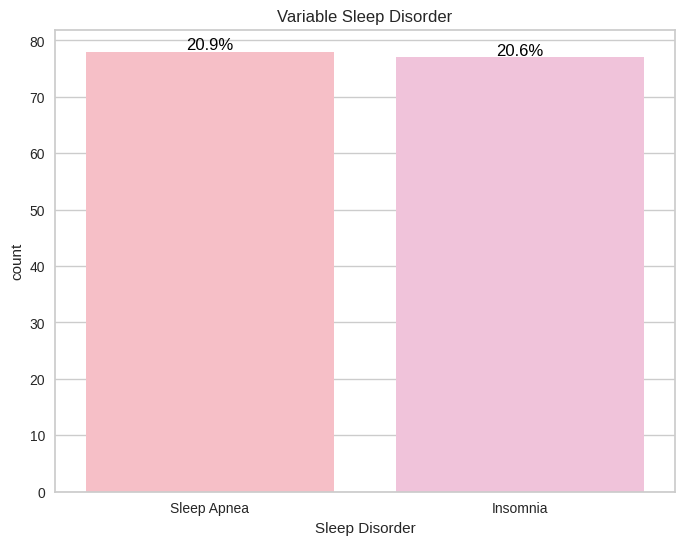

In [11]:
# eksplorasi variable Sleep Disorder

# Plot the countplot for Sleep Disorder
plt.figure(figsize=(8, 6))
sns.countplot(x='Sleep Disorder', palette=colors, data=df)

# Calculate the total count of Sleep Disorder categories
total_count = len(df)

# Annotate the plot with percentage values
ax = plt.gca()
for p in ax.patches:
    # Get the height of each bar
    height = p.get_height()
    # Calculate the percentage
    percentage = (height / total_count) * 100
    # Annotate the percentage above each bar
    ax.annotate(f'{percentage:.1f}%',
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center',
                fontsize=12, color='black',
                xytext=(0, 5), textcoords='offset points')

# Set the title of the plot
plt.gca().set_title('Variable Sleep Disorder')

# Display the plot
plt.show()

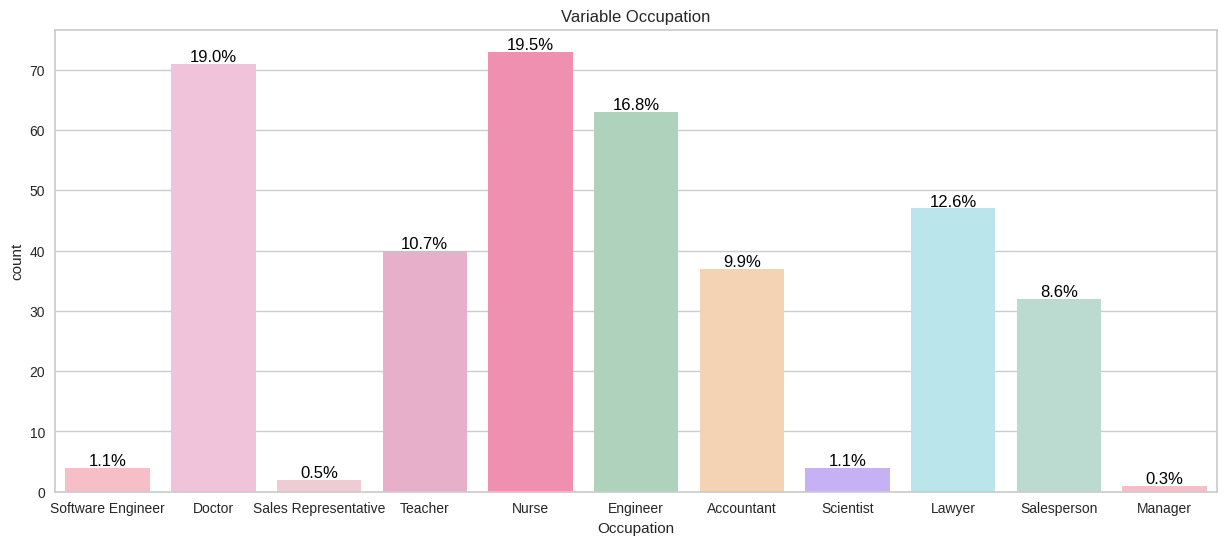

In [12]:
# eksplorasi variable Occupation

# Plot the countplot for Occupation
plt.figure(figsize=(15, 6))
sns.countplot(x='Occupation', palette=colors, data=df)

# Calculate the total count of Occupation categories
total_count = len(df)

# Annotate the plot with percentage values
ax = plt.gca()
for p in ax.patches:
    # Get the height of each bar
    height = p.get_height()
    # Calculate the percentage
    percentage = (height / total_count) * 100
    # Annotate the percentage above each bar
    ax.annotate(f'{percentage:.1f}%',
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center',
                fontsize=12, color='black',
                xytext=(0, 5), textcoords='offset points')

# Set the title of the plot
plt.gca().set_title('Variable Occupation')

# Display the plot
plt.show()

Insight:

Berdasarkan grafik terlihat bahwa terbanyak yang mengidap Sleep Disorder ada di pekerjaan dibidang kesehatan.

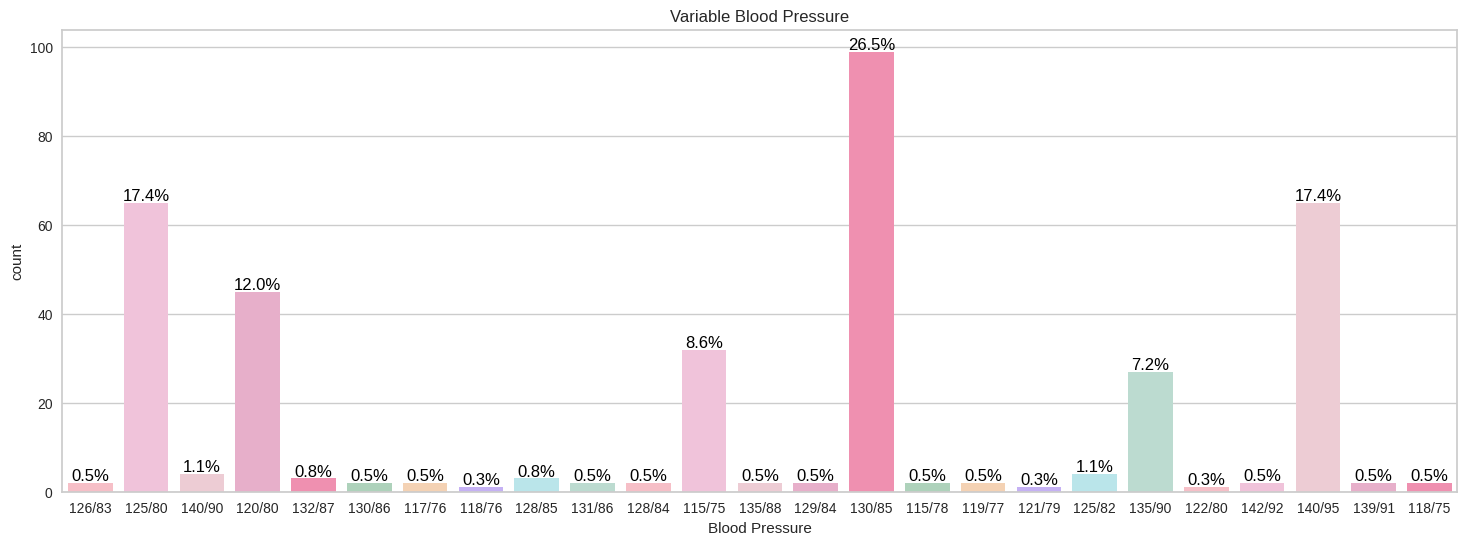

In [13]:
# eksplorasi variable Blood Pressure

# Plot the countplot for Blood Pressure
plt.figure(figsize=(18, 6))
sns.countplot(x='Blood Pressure', palette=colors, data=df)

# Calculate the total count of Blood Pressure categories
total_count = len(df)

# Annotate the plot with percentage values
ax = plt.gca()
for p in ax.patches:
    # Get the height of each bar
    height = p.get_height()
    # Calculate the percentage
    percentage = (height / total_count) * 100
    # Annotate the percentage above each bar
    ax.annotate(f'{percentage:.1f}%',
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center',
                fontsize=12, color='black',
                xytext=(0, 5), textcoords='offset points')

# Set the title of the plot
plt.gca().set_title('Variable Blood Pressure')

# Display the plot
plt.show()

Insight :

Grafik menunjukkan sebagian besar orang memiliki tekanan darah tinggi (terutama **130/84, 126/83, 140/95, 140/80**).

- Tekanan darah tinggi sangat umum pada penderita sleep disorder. Jadi, tingginya angka tekanan darah tinggi di sini bisa jadi indikasi banyak orang di data ini menderita sleep disorder.

- Data tekanan darah ini menyiratkan kemungkinan besar ada hubungan kuat dengan gangguan tidur di populasi ini, dan perlu penelitian lebih lanjut untuk memastikannya.

## Analisis Kolom Numerik

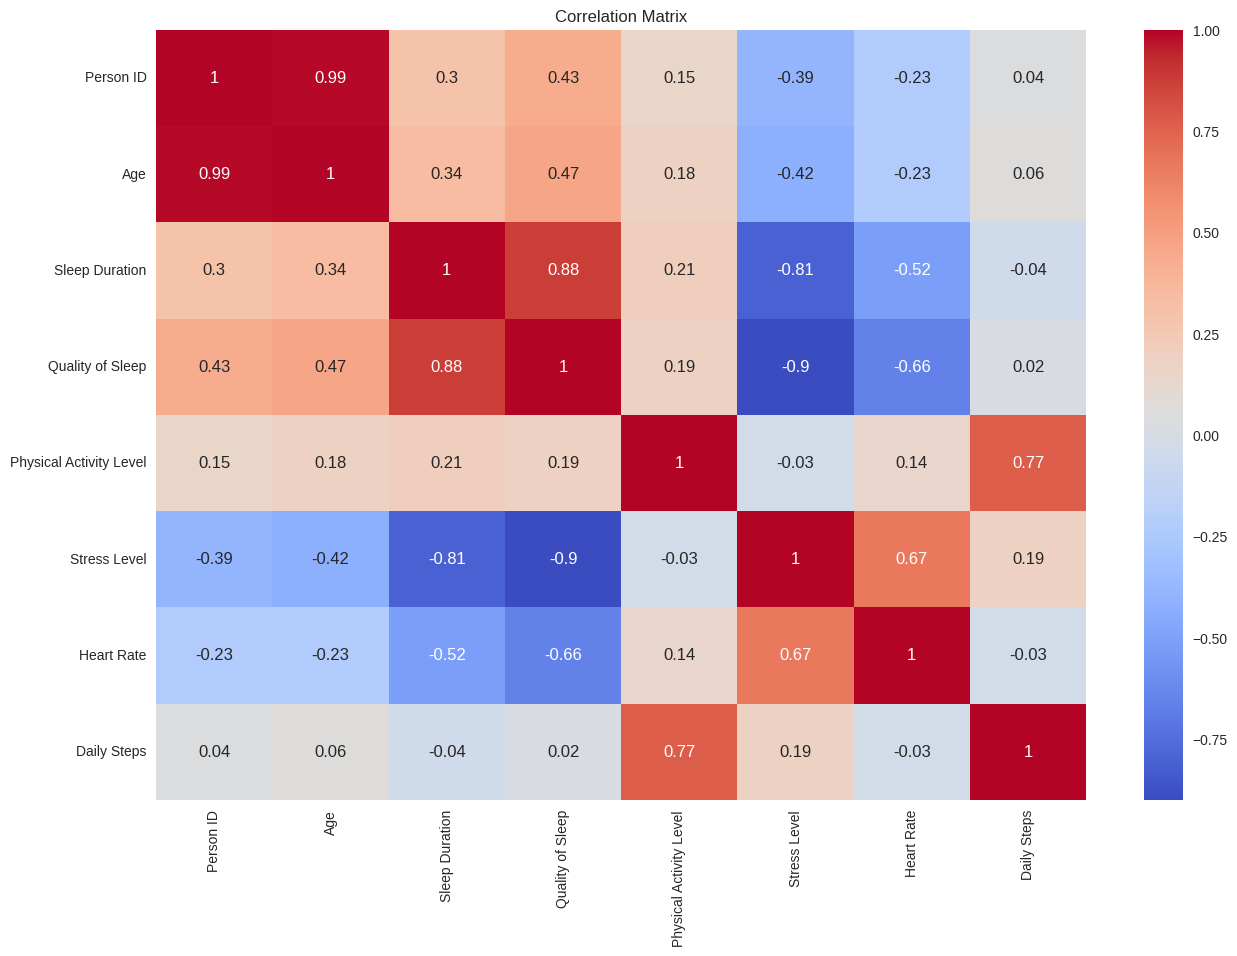

In [14]:
# ambil yang numerical kolom aja dan komputasi kan ke correlation matrix
corr_matrix = df.select_dtypes(include=[np.number]).corr().round(2)
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

beberapa insight yang didapatkan dari matriks korelasi ini :

1.  **Hubungan Kuat Antara Durasi Tidur dan Kualitas Tidur:**
    * Korelasi: "Sleep Duration" dan "Quality of Sleep" memiliki korelasi positif yang sangat kuat (**0.88**).
    * **Insight:** Ini menunjukkan bahwa semakin lama seseorang tidur, kualitas tidurnya cenderung semakin baik. Ini adalah penemuan yang intuitif tetapi penting, menggarisbawahi bahwa **kuantitas (durasi) tidur sangat memengaruhi kualitas istirahat**. Bagi penderita gangguan tidur, ini berarti perpanjangan durasi tidur yang sehat bisa menjadi kunci peningkatan kualitas tidur mereka.

2.  **Stres adalah Musuh Utama Kualitas Tidur:**
    * Korelasi: "Quality of Sleep" memiliki korelasi negatif yang sangat kuat dengan "Stress Level" (**-0.90**). "Sleep Duration" juga memiliki korelasi negatif yang kuat dengan "Stress Level" (**-0.81**).
    * **Insight:** Ini adalah insight paling mencolok. **Semakin tinggi tingkat stres seseorang, semakin buruk kualitas tidurnya dan semakin pendek durasi tidurnya.** Ini sangat relevan untuk gangguan tidur. Mengelola stres (misalnya melalui meditasi, terapi, atau perubahan gaya hidup) bisa menjadi intervensi krusial untuk meningkatkan kualitas dan durasi tidur, dan mungkin membantu mengatasi insomnia atau gangguan tidur lainnya yang dipicu stres.

3.  **Aktivitas Fisik dan Detak Jantung:**
    * Korelasi: "Physical Activity Level" memiliki korelasi positif kuat dengan "Daily Steps" (**0.77**). "Physical Activity Level" memiliki korelasi negatif lemah dengan "Stress Level" (-0.03), dan korelasi positif lemah dengan "Heart Rate" (0.14).
    * **Insight:** Orang yang lebih aktif secara fisik cenderung memiliki jumlah langkah harian yang lebih tinggi. Menariknya, meskipun aktivitas fisik sering dikaitkan dengan penurunan stres dan kesehatan jantung yang lebih baik, korelasi langsungnya dengan "Stress Level" dan "Heart Rate" di sini terlihat lemah. Ini mungkin karena variabel "Physical Activity Level" hanya mengukur tingkat aktivitas, bukan intensitas atau jenisnya yang spesifik memengaruhi stres atau detak jantung secara langsung dalam dataset ini.

4.  **Detak Jantung dan Stres: Hubungan Langsung:**
    * Korelasi: "Heart Rate" memiliki korelasi positif yang kuat dengan "Stress Level" (**0.67**).
    * **Insight:** Ini menunjukkan bahwa **semakin tinggi tingkat stres seseorang, semakin tinggi detak jantungnya**. Ini adalah respons fisiologis yang umum terhadap stres. Dalam konteks gangguan tidur, stres kronis yang meningkatkan detak jantung bisa mempersulit seseorang untuk rileks dan tertidur, atau menjaga tidur tetap nyenyak.

5.  **Variabel yang Kurang Relevan dengan Tidur (Dalam Data Ini):**
    * Korelasi: "Age" dan "Person ID" umumnya memiliki korelasi yang lemah dengan variabel tidur ("Sleep Duration" dan "Quality of Sleep"). "Daily Steps" juga memiliki korelasi yang sangat lemah dengan "Sleep Duration" (-0.04) dan "Quality of Sleep" (0.02).
    * **Insight:** Berdasarkan data ini, usia dan ID individu tidak terlalu berpengaruh langsung pada durasi atau kualitas tidur. Demikian pula, jumlah langkah harian (yang merupakan ukuran aktivitas fisik) tidak menunjukkan hubungan langsung yang kuat dengan tidur. Ini bisa berarti bahwa dalam dataset ini, **kualitas tidur lebih dipengaruhi oleh faktor internal seperti tingkat stres daripada sekadar usia atau seberapa banyak seseorang berjalan**.

Dari matriks ini, kita bisa mendapatkan gambaran jelas bahwa:
* **Stres adalah faktor kunci yang merusak durasi dan kualitas tidur.** Intervensi yang menargetkan pengelolaan stres akan sangat relevan.
* **Durasi tidur sangat menentukan kualitas tidur.** Memastikan waktu tidur yang cukup adalah fundamental.
* **Detak jantung cenderung meningkat seiring stres**, yang bisa jadi indikator fisiologis dari masalah tidur terkait stres.


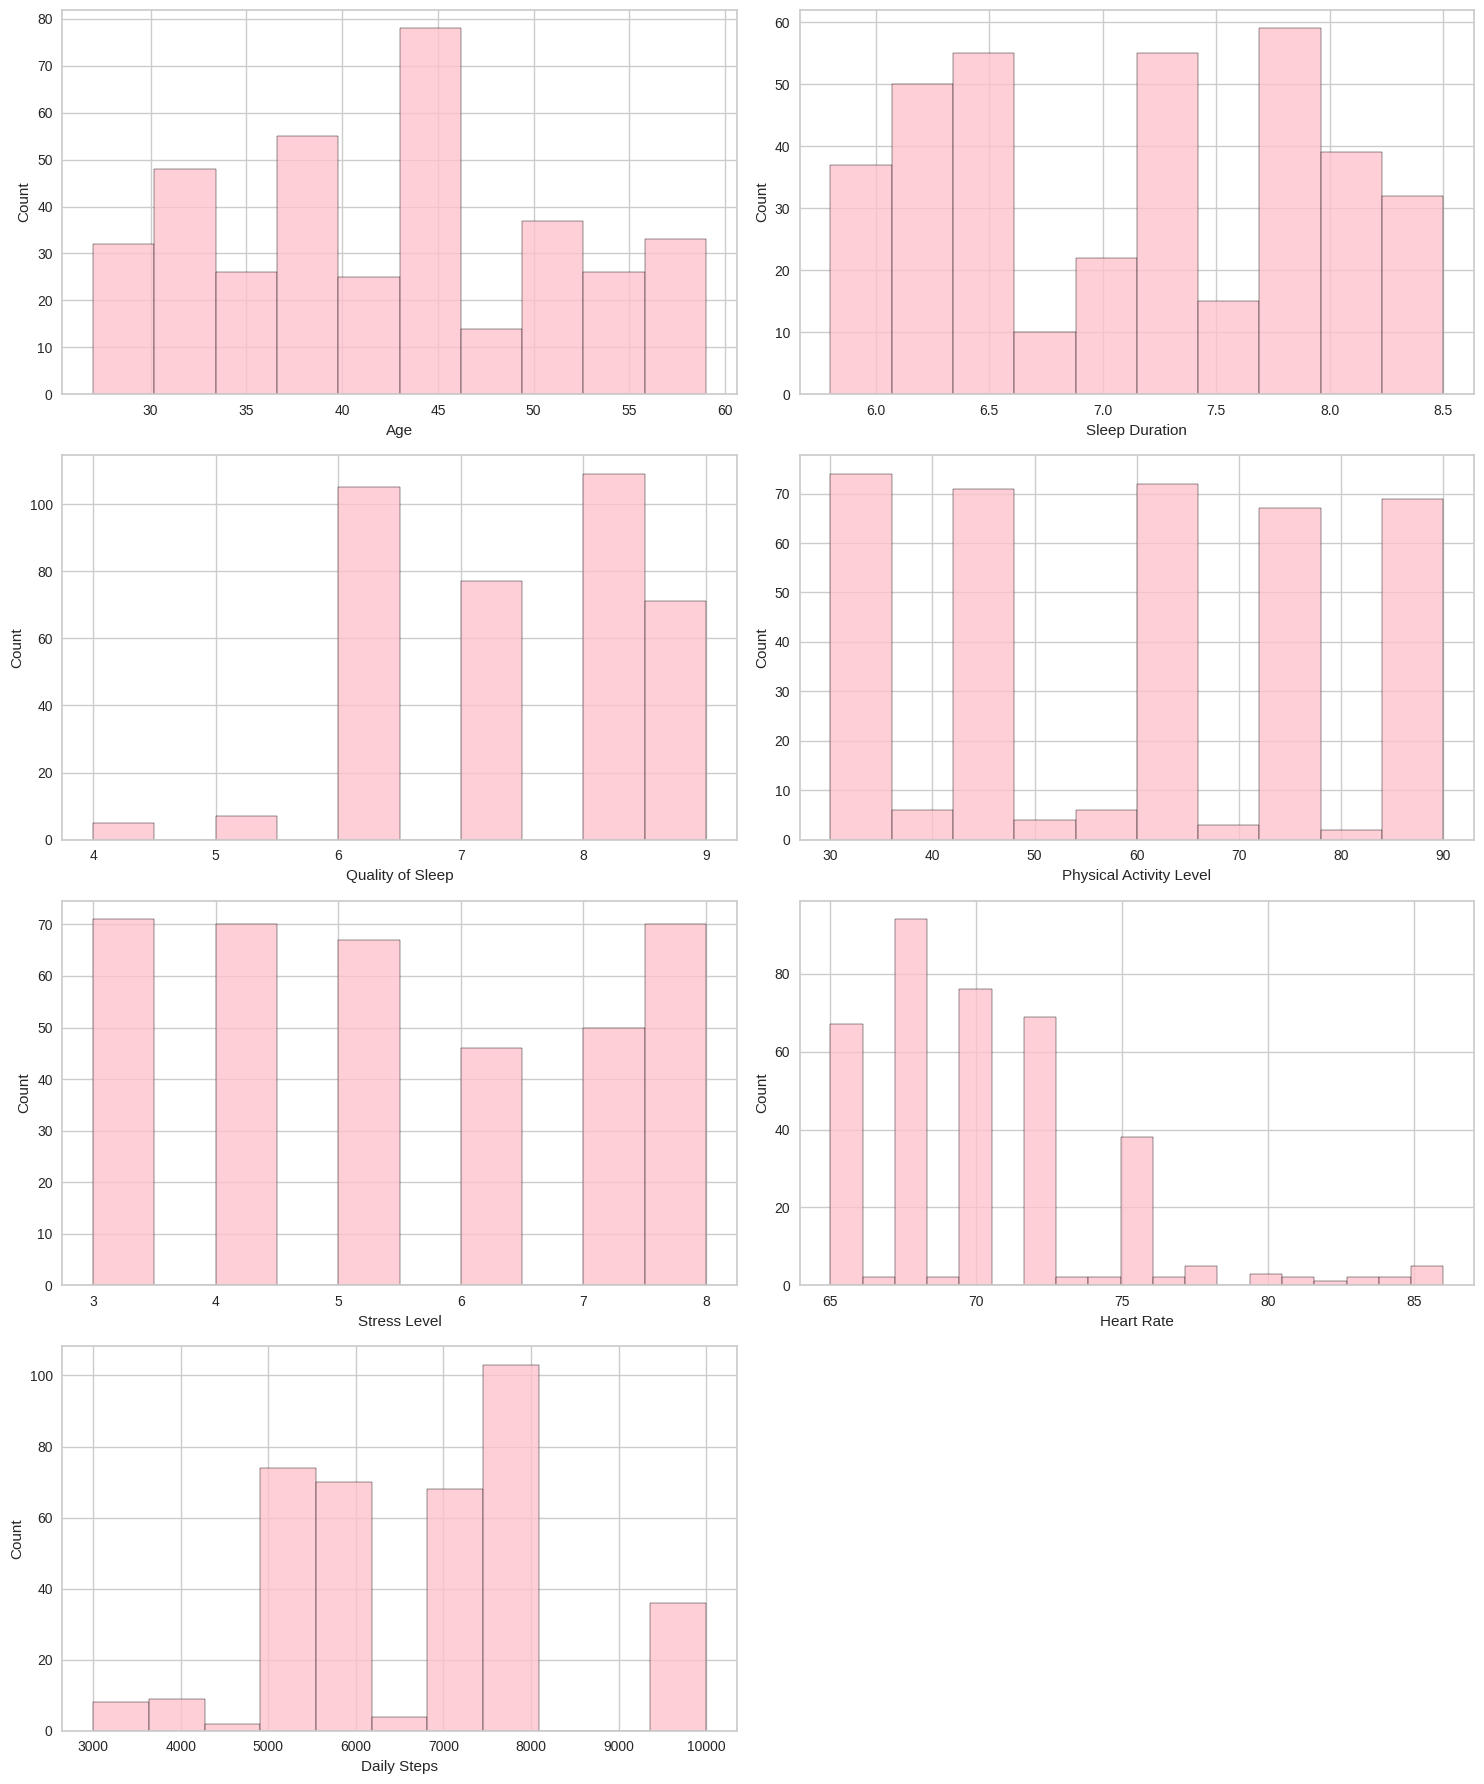

In [15]:
# Set the figure size
plt.figure(figsize=(15, 18))

# Plot 1: Age
plt.subplot(4, 2, 1)
sns.histplot(x=df['Age'], kde=False, color='pink')

# Plot 2: Sleep Duration
plt.subplot(4, 2, 2)
sns.histplot(x=df['Sleep Duration'], kde=False, color='pink')

# Plot 3: Quality of Sleep
plt.subplot(4, 2, 3)
sns.histplot(x=df['Quality of Sleep'], kde=False, color='pink')

# Plot 4: Physical Activity Level
plt.subplot(4, 2, 4)
sns.histplot(x=df['Physical Activity Level'], kde=False, color='pink')

# Plot 5: Stress Level
plt.subplot(4, 2, 5)
sns.histplot(x=df['Stress Level'], kde=False, color='pink')

# Plot 6: Heart Rate
plt.subplot(4, 2, 6)
sns.histplot(x=df['Heart Rate'], kde=False, color='pink')

# Plot 7: Daily Steps
plt.subplot(4, 2, 7)
sns.histplot(x=df['Daily Steps'], kde=False, color='pink')

# Adjust layout to prevent overlap
plt.tight_layout()

# Display all the plots
plt.show()


Insight yang di dapat :

1.  **Banyak Orang Punya Tekanan Darah Tinggi:** Ini masalah kesehatan utama di populasi data ini (terutama 130/84, 126/83, 140/95).
2.  **Stres Sangat Umum & Merusak Tidur:** Banyak yang stres, dan stres ini sangat terkait dengan buruknya kualitas dan durasi tidur.
3.  **Meskipun Tidur Merasa Baik, Tekanan Darah Tetap Tinggi:** Ini menunjukkan ada kemungkinan masalah kesehatan tersembunyi (misalnya sleep apnea yang tidak disadari) atau faktor lain yang menyebabkan tekanan darah tinggi.

**Insight Utama:** Populasi ini menghadapi tantangan besar terkait tekanan darah tinggi, yang sangat mungkin dipengaruhi oleh tingkat stres yang tinggi dan berpotensi adanya gangguan tidur yang belum terdiagnosis.

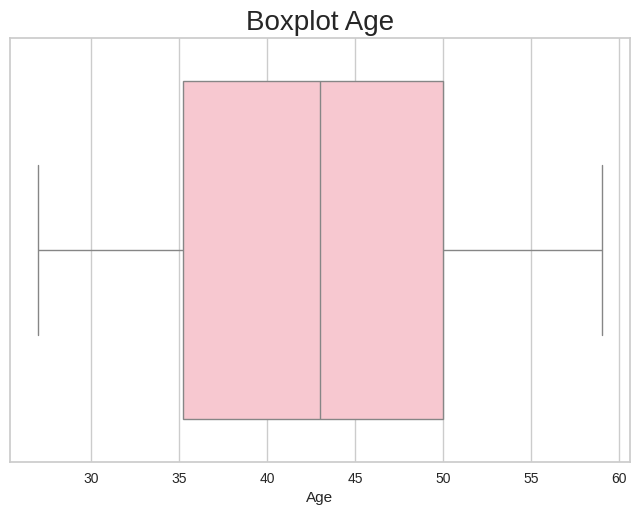

In [16]:
plt.title("Boxplot Age", fontdict = {'fontsize': 20})
sns.boxplot(x=df["Age"], color='pink')
plt.show()

<Axes: title={'center': 'Boxplot Sleep Duration'}, xlabel='Sleep Duration'>

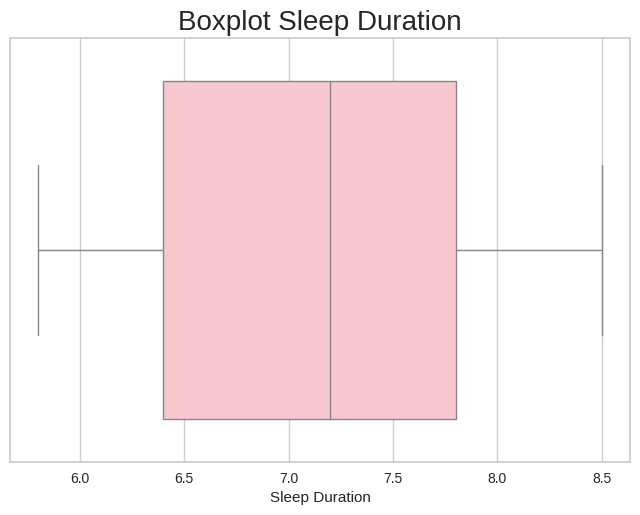

In [17]:
plt.title("Boxplot Sleep Duration", fontdict = {'fontsize': 20})
sns.boxplot(x=df["Sleep Duration"], color='pink')

<Axes: title={'center': 'Boxplot Quality of Sleep'}, xlabel='Quality of Sleep'>

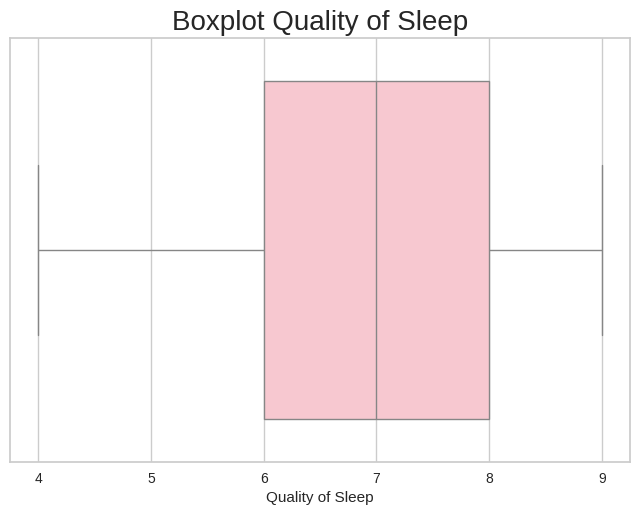

In [18]:
plt.title("Boxplot Quality of Sleep", fontdict = {'fontsize': 20})
sns.boxplot(x=df["Quality of Sleep"], color='pink')

<Axes: title={'center': 'Boxplot Physical Activity Level'}, xlabel='Physical Activity Level'>

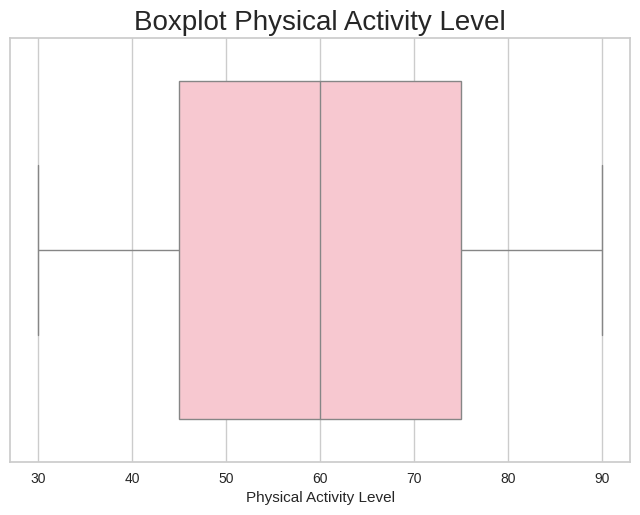

In [19]:
plt.title("Boxplot Physical Activity Level", fontdict = {'fontsize': 20})
sns.boxplot(x=df["Physical Activity Level"], color='pink')

<Axes: title={'center': 'Boxplot Stress Level'}, xlabel='Stress Level'>

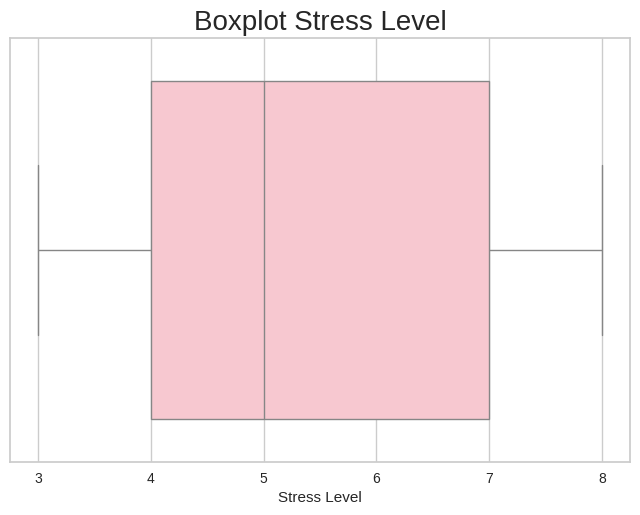

In [20]:
plt.title("Boxplot Stress Level", fontdict = {'fontsize': 20})
sns.boxplot(x=df["Stress Level"], color='pink')

<Axes: title={'center': 'Boxplot Heart Rate'}, xlabel='Heart Rate'>

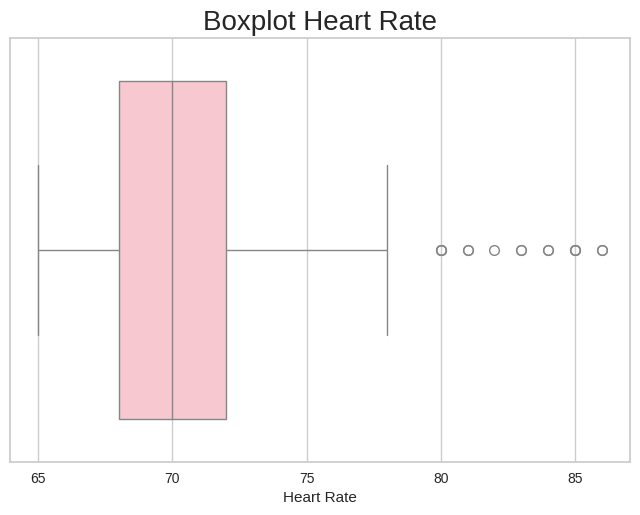

In [21]:
plt.title("Boxplot Heart Rate", fontdict = {'fontsize': 20})
sns.boxplot(x=df["Heart Rate"], color='pink')

<Axes: title={'center': 'Boxplot Daily Steps'}, xlabel='Daily Steps'>

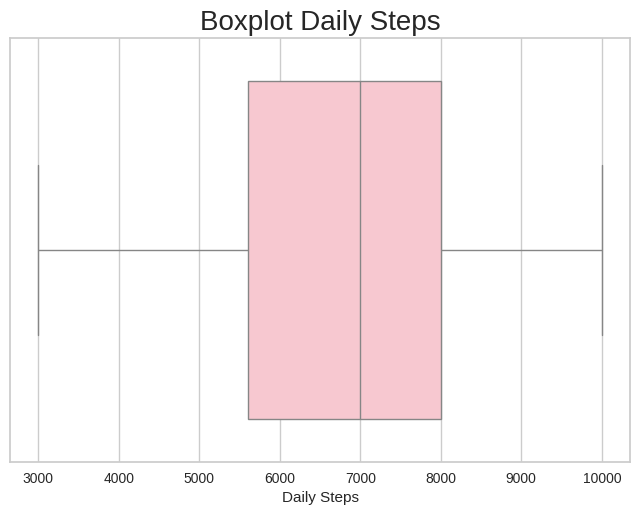

In [22]:
plt.title("Boxplot Daily Steps", fontdict = {'fontsize': 20})
sns.boxplot(x=df["Daily Steps"], color='pink')

terdapat beberapa outlier di bloxplot heart rate

## Bivariate Analysis

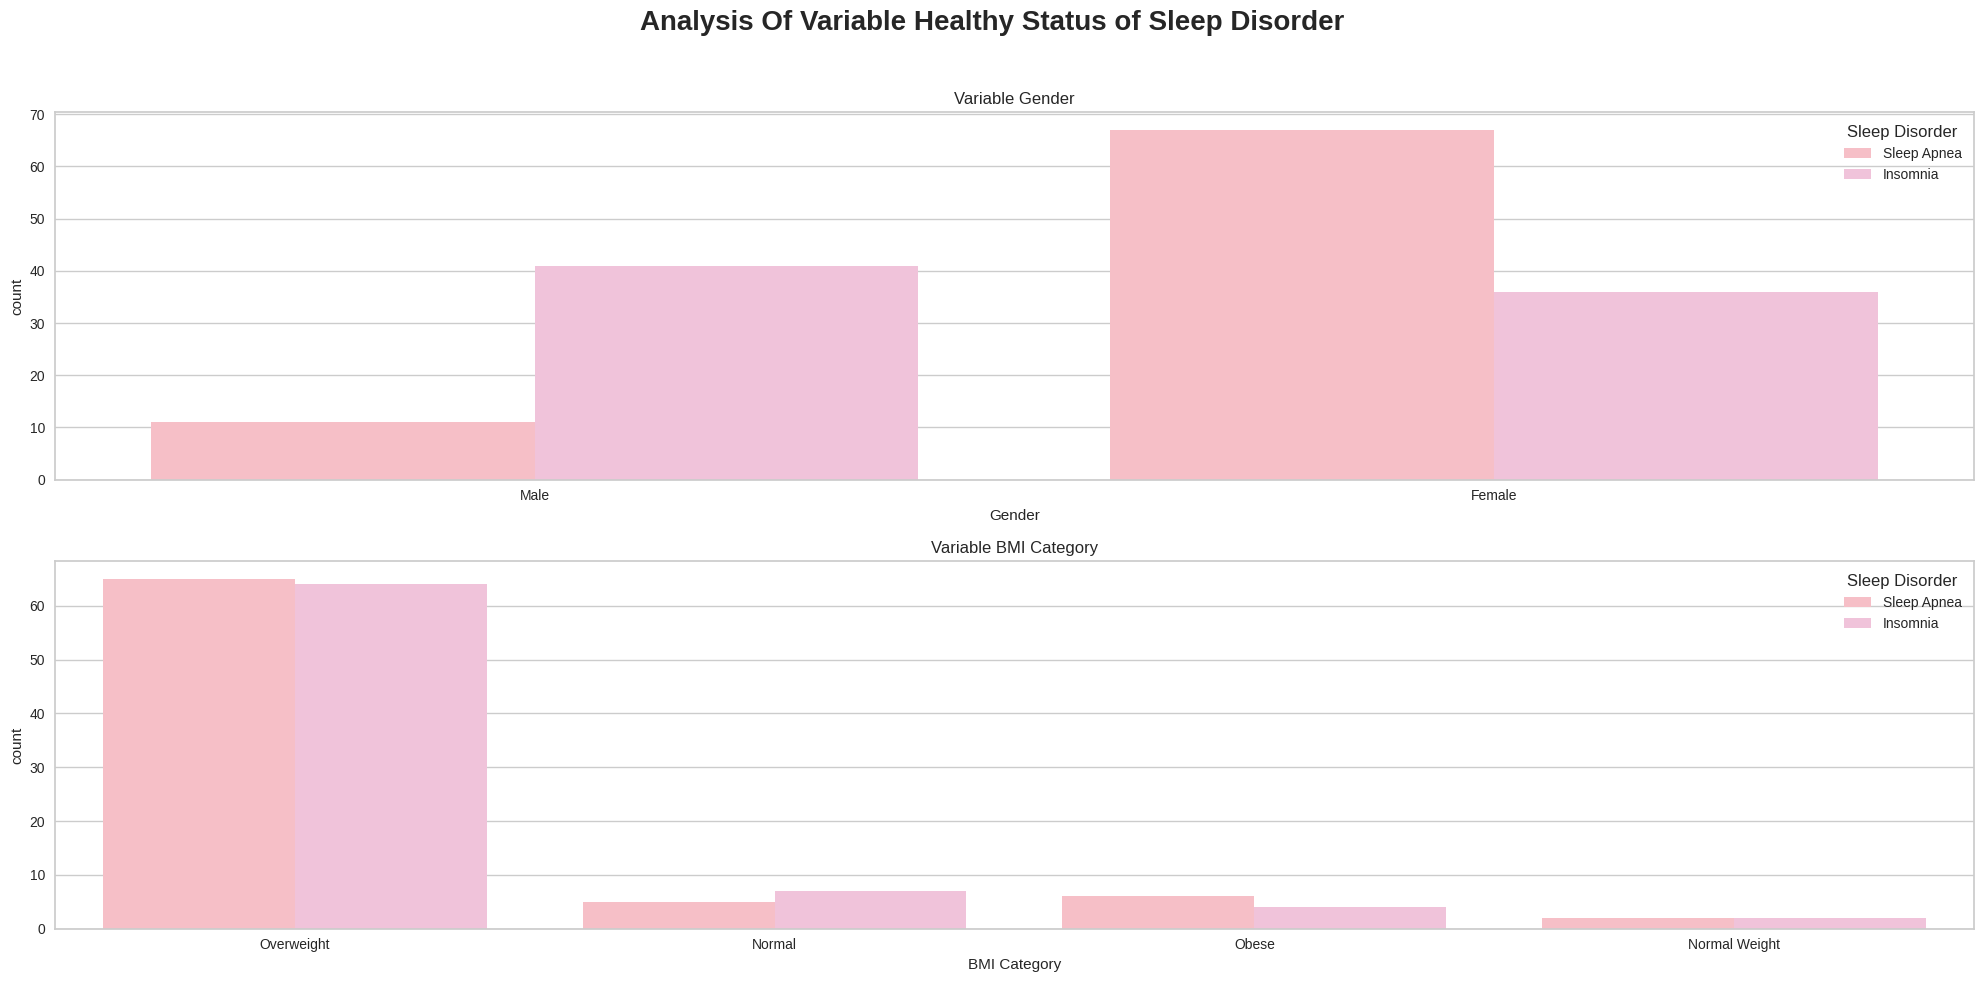

In [23]:
# Set the figure size
plt.figure(figsize=(20, 10))

# Set the main title
plt.suptitle("Analysis Of Variable Healthy Status of Sleep Disorder", fontweight="bold", fontsize=20)

# Plot 1: Gender vs Sleep Disorder
plt.subplot(2, 1, 1)
plt.gca().set_title('Variable Gender')
sns.countplot(x='Gender', hue='Sleep Disorder', palette=colors, data=df)

# Plot 2: BMI Category vs Sleep Disorder
plt.subplot(2, 1, 2)
plt.gca().set_title('Variable BMI Category')
sns.countplot(x='BMI Category', hue='Sleep Disorder', palette=colors, data=df)

# Adjust layout to prevent overlap
plt.tight_layout(rect=[0, 0, 1, 0.96])

# Display all the plots
plt.show()


<Axes: xlabel='Sleep Disorder', ylabel='Daily Steps'>

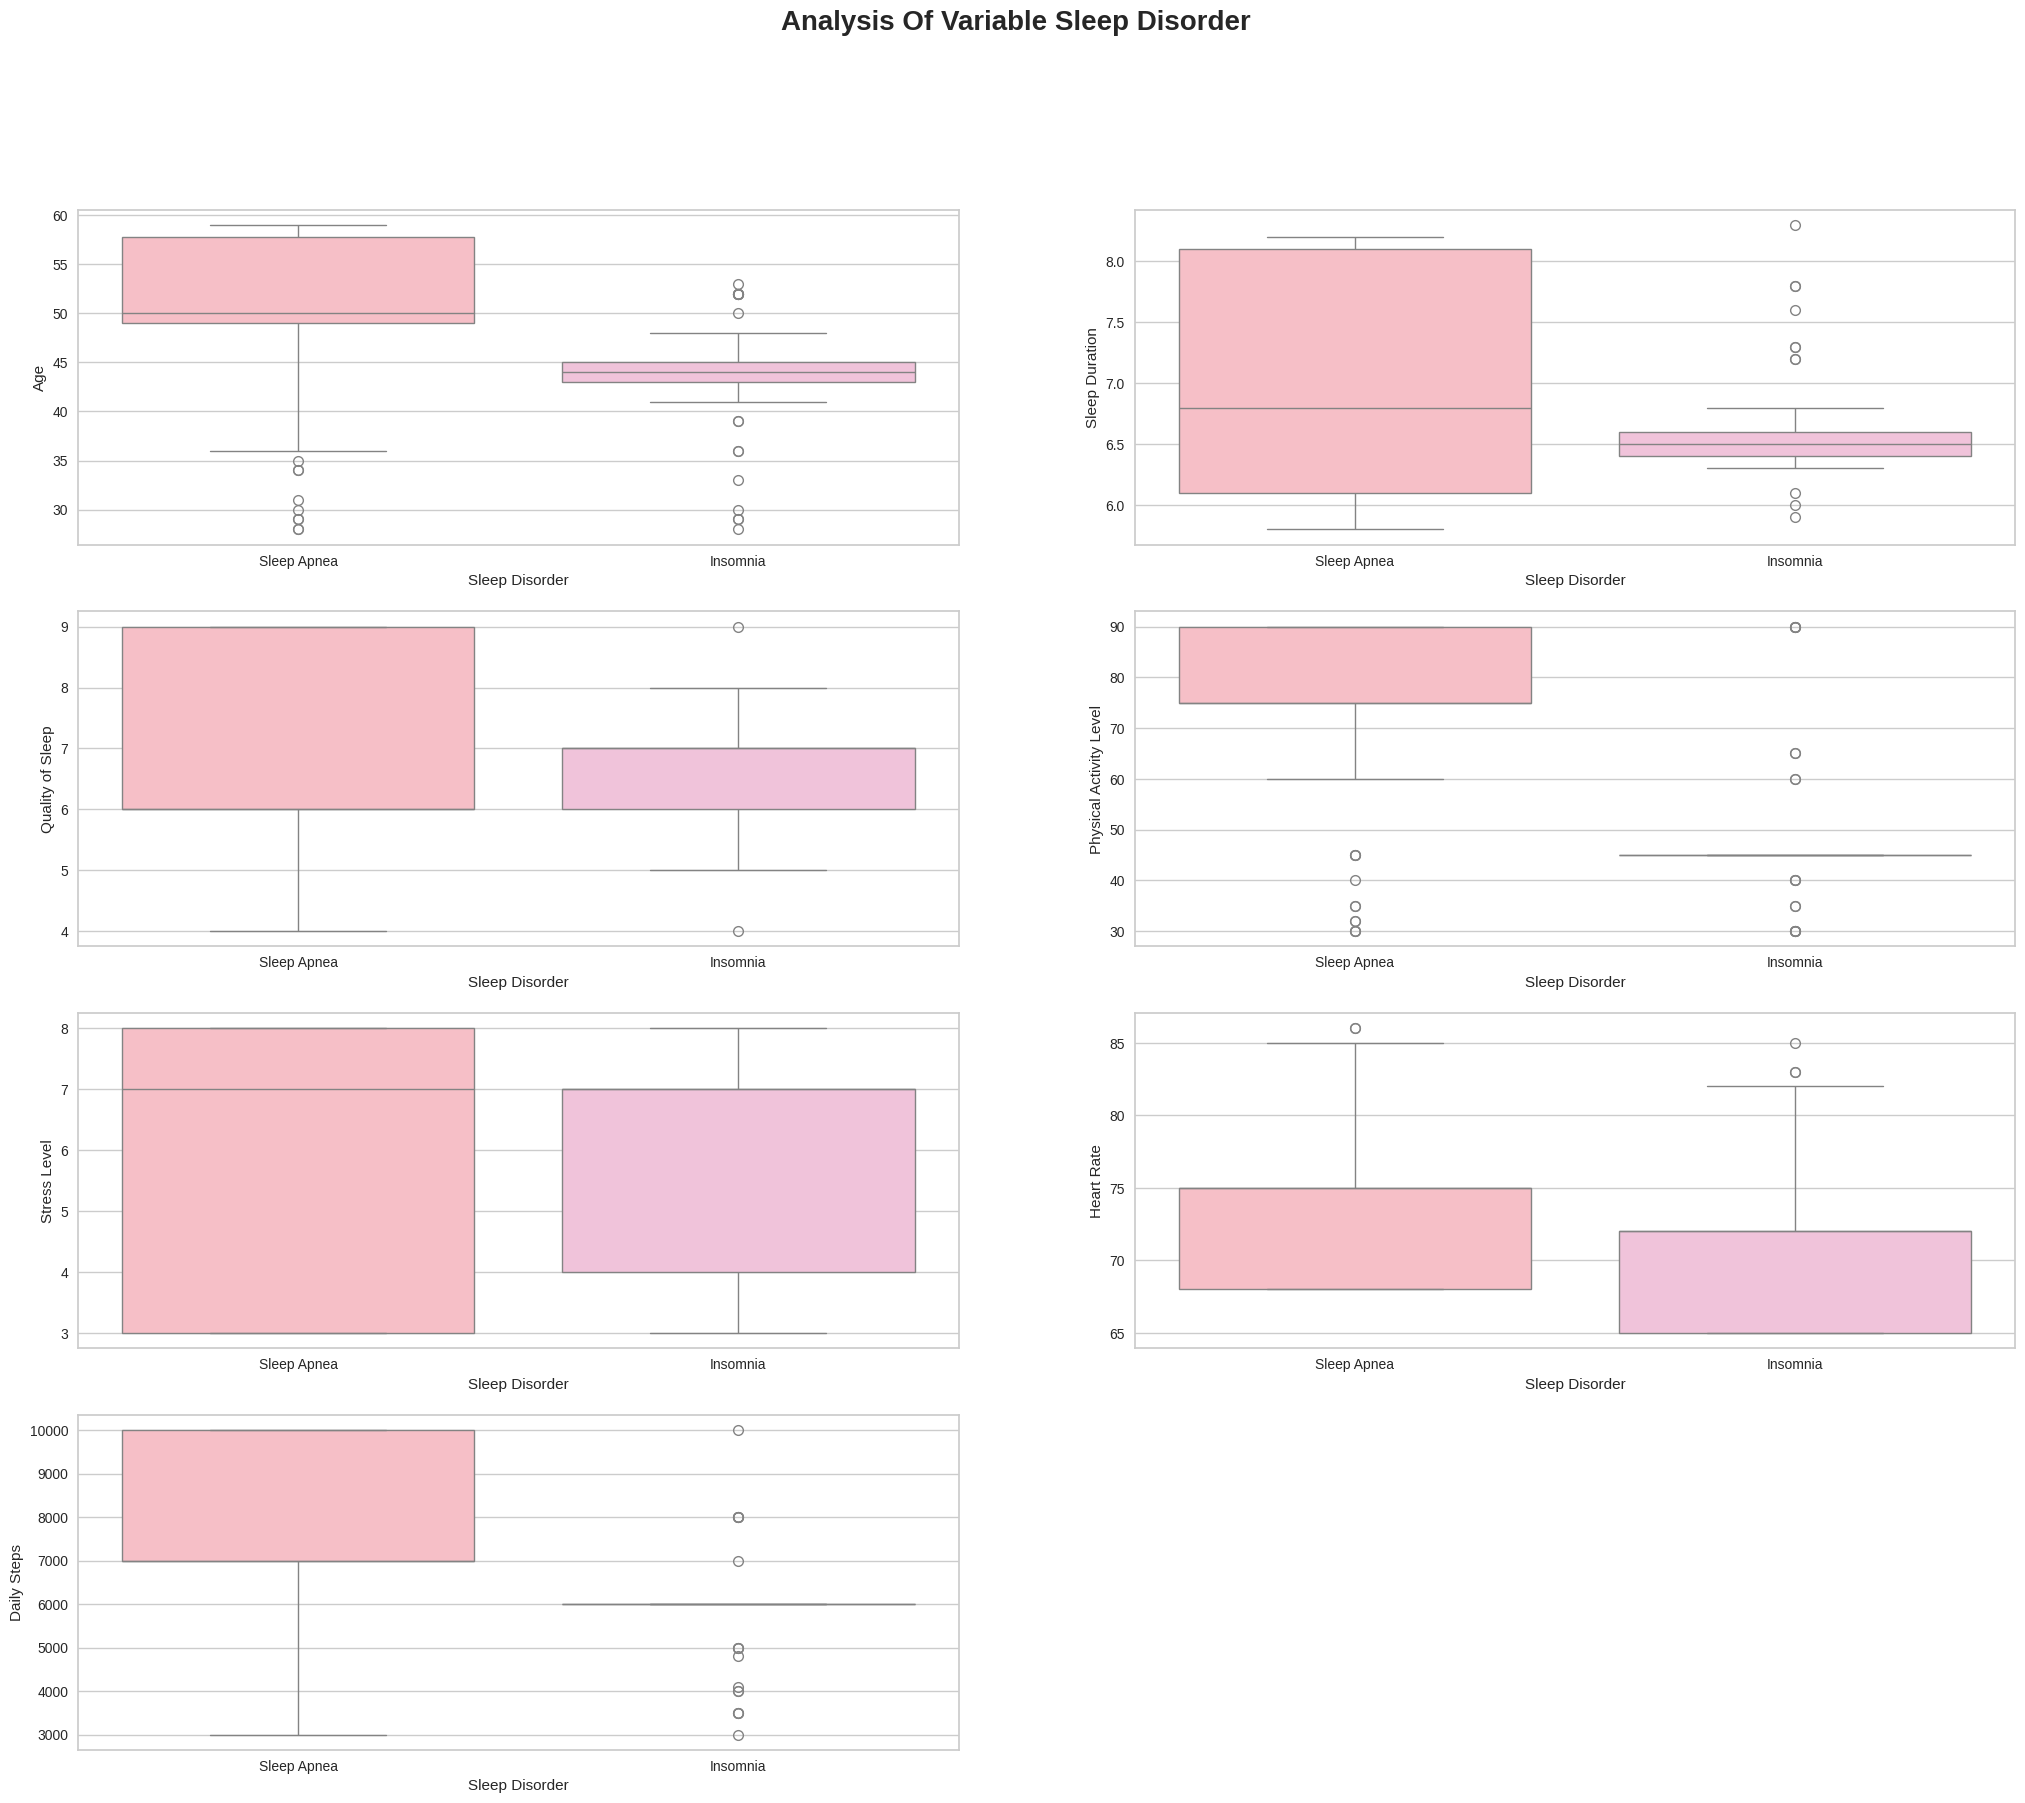

In [24]:
plt.figure(figsize = (25, 20))
plt.suptitle("Analysis Of Variable Sleep Disorder",fontweight="bold", fontsize=20)

plt.subplot(4,2,1)
sns.boxplot(x="Sleep Disorder", y="Age", palette=colors, data=df)

plt.subplot(4,2,2)
sns.boxplot(x="Sleep Disorder", y="Sleep Duration",palette=colors, data=df)

plt.subplot(4,2,3)
sns.boxplot(x="Sleep Disorder", y="Quality of Sleep",palette=colors, data=df)

plt.subplot(4,2,4)
sns.boxplot(x="Sleep Disorder", y="Physical Activity Level",palette=colors, data=df)

plt.subplot(4,2,5)
sns.boxplot(x="Sleep Disorder", y="Stress Level",palette=colors, data=df)

plt.subplot(4,2,6)
sns.boxplot(x="Sleep Disorder", y="Heart Rate",palette=colors, data=df)

plt.subplot(4,2,7)
sns.boxplot(x="Sleep Disorder", y="Daily Steps",palette=colors, data=df)

Insight :

* Age (Usia):
    * Sleep Apnea: Rentang usia lebih luas, dengan median sekitar 55 tahun. Banyak outlier pada usia yang lebih muda (30-an).
    * Insomnia: Rentang usia lebih sempit, median sekitar 45 tahun, dengan outlier pada usia lebih tua.
    * Insight: Penderita Sleep Apnea cenderung berusia lebih tua dan memiliki variasi usia yang lebih besar dibandingkan penderita Insomnia. Insomnia lebih banyak terjadi pada rentang usia menengah.

* Sleep Duration (Durasi Tidur):
    * Sleep Apnea: Median durasi tidur sekitar 7.5 - 8 jam. Rentangnya cukup sempit di sekitar 7.5 - 8.0 jam.
    * Insomnia: Median durasi tidur sekitar 6.5 jam. Rentangnya lebih sempit dan lebih rendah dari Sleep Apnea.
    * Insight: Penderita Sleep Apnea (yang mungkin tidak sadar akan gangguan napasnya) justru melaporkan durasi tidur yang lebih panjang dibandingkan penderita Insomnia. Ini masuk akal, karena penderita Insomnia memang kesulitan untuk tidur lama.

* Quality of Sleep (Kualitas Tidur):
    * Sleep Apnea: Median kualitas tidur sangat tinggi, sekitar 9. Rentang nilai juga tinggi.
    * Insomnia: Median kualitas tidur jauh lebih rendah, sekitar 7. Rentang nilai juga lebih rendah.
    * Insight: Ini adalah insight krusial. Penderita Sleep Apnea cenderung melaporkan kualitas tidur yang sangat baik (subyektif), meskipun mereka memiliki kondisi medis. Sebaliknya, penderita Insomnia secara jelas melaporkan kualitas tidur yang lebih buruk, yang memang merupakan inti dari kondisi mereka. Ini menunjukkan bahwa penilaian subyektif terhadap kualitas tidur bisa menyesatkan, terutama pada penderita sleep apnea yang mungkin tidak menyadari gangguan tidurnya.

* Physical Activity Level (Tingkat Aktivitas Fisik):
    * Sleep Apnea: Median tingkat aktivitas fisik cenderung tinggi, sekitar 80.
    * Insomnia: Median tingkat aktivitas fisik lebih rendah, sekitar 50-60.
    * Insight: Penderita Sleep Apnea cenderung lebih aktif secara fisik dibandingkan penderita Insomnia.

* Stress Level (Tingkat Stres):
    * Sleep Apnea: Median tingkat stres sekitar 5-6.
    * Insomnia: Median tingkat stres lebih tinggi, sekitar 7.
    * Insight: Penderita Insomnia secara signifikan memiliki tingkat stres yang lebih tinggi dibandingkan penderita Sleep Apnea. Ini memperkuat gagasan bahwa stres adalah pemicu atau konsekuensi utama Insomnia.

* Heart Rate (Detak Jantung):
    * Sleep Apnea: Median detak jantung lebih tinggi, sekitar 70-75 bpm.
    * Insomnia: Median detak jantung lebih rendah, sekitar 65-70 bpm.
    * Insight: Penderita Sleep Apnea cenderung memiliki detak jantung istirahat yang lebih tinggi. Ini konsisten dengan fakta bahwa sleep apnea dapat menekan sistem kardiovaskular.

* Daily Steps (Langkah Harian):
    * Sleep Apnea: Median langkah harian lebih tinggi, sekitar 8000-9000.
    * Insomnia: Median langkah harian lebih rendah, sekitar 5000-6000.
    * Insight: Mirip dengan aktivitas fisik, penderita Sleep Apnea cenderung memiliki langkah harian yang lebih banyak.

Insight Singkat:

Menunjukkan perbedaan yang jelas antara penderita Sleep Apnea dan Insomnia:

* Insomnia: Ditandai dengan usia lebih muda (median), durasi tidur lebih pendek, kualitas tidur yang buruk (sesuai harapan), tingkat stres yang jauh lebih tinggi, dan tingkat aktivitas fisik/langkah harian yang lebih rendah.
* Sleep Apnea: Ditandai dengan usia lebih tua (median), durasi tidur yang dilaporkan lebih panjang, kualitas tidur yang dilaporkan sangat baik (mungkin subyektif dan menyesatkan), detak jantung yang lebih tinggi, dan tingkat aktivitas fisik/langkah harian yang lebih tinggi.


<Axes: title={'center': 'Variable Blood Pressure'}, xlabel='Blood Pressure', ylabel='count'>

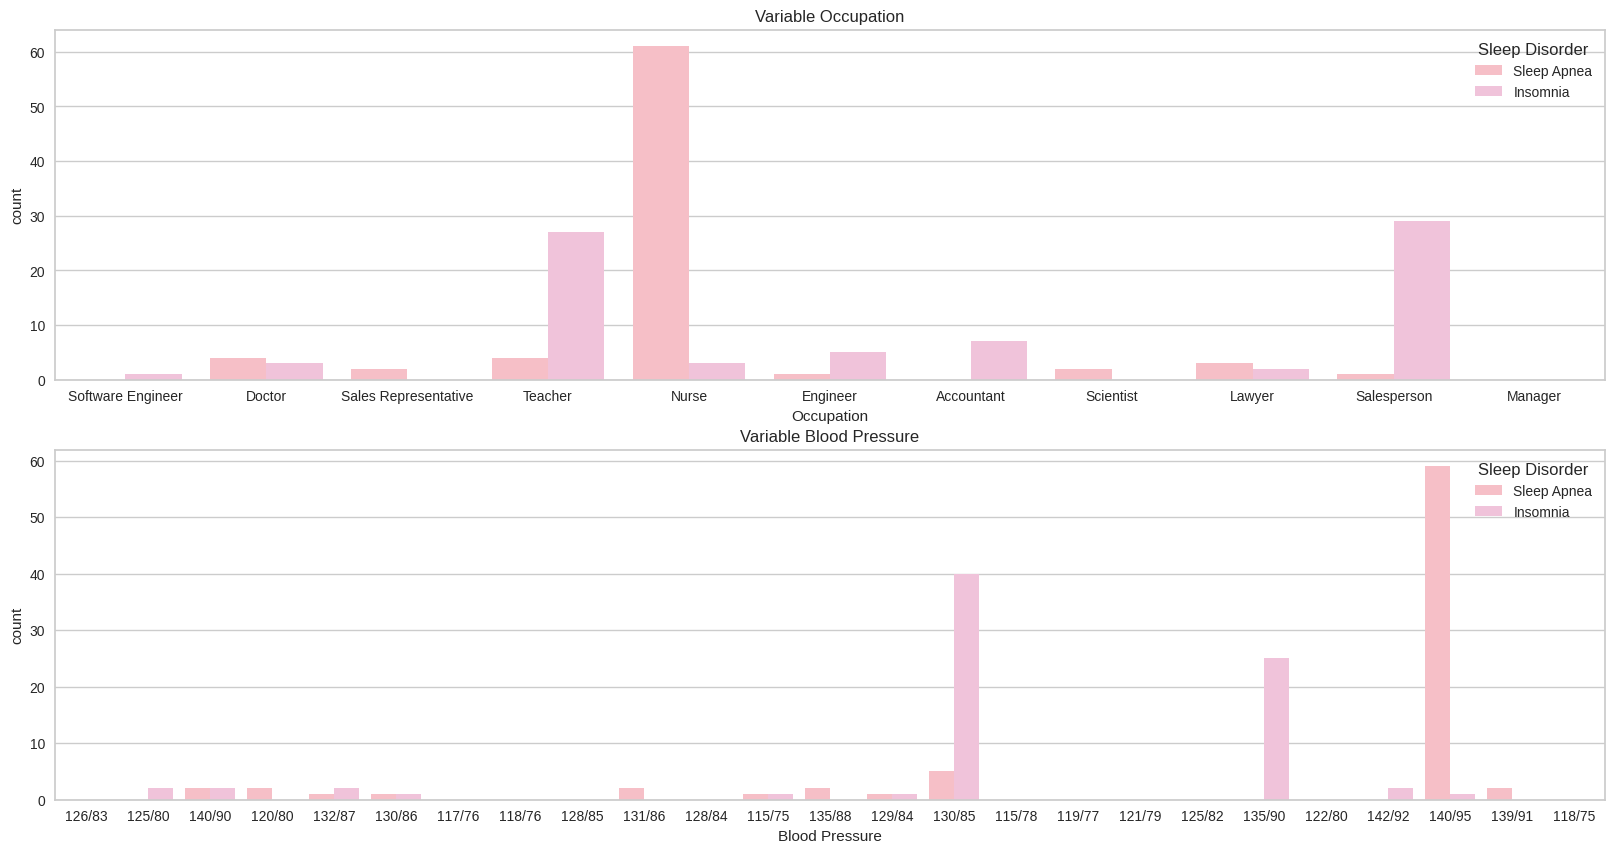

In [25]:
plt.figure(figsize = (20, 10))

plt.subplot(2, 1, 1)
plt.gca().set_title('Variable Occupation')
sns.countplot(x = 'Occupation', hue = 'Sleep Disorder', palette = colors, data = df)

plt.subplot(2, 1, 2)
plt.gca().set_title('Variable Blood Pressure')
sns.countplot(x = 'Blood Pressure', hue = 'Sleep Disorder', palette = colors, data = df)

Insight :

1.  **Perawat Dominan Punya Sleep Apnea:** Pekerjaan "Nurse" (Perawat) paling banyak mengalami "Sleep Apnea" dibandingkan pekerjaan lain.
2.  **Guru Paling Banyak Insomnia:** Pekerjaan "Teacher" (Guru) adalah yang paling banyak menderita "Insomnia".
3.  **Tekanan Darah Tinggi Sering Terjadi pada Penderita Gangguan Tidur:** Pembacaan tekanan darah seperti **140/95** (Sleep Apnea) dan **130/85** (Insomnia) sangat dominan pada penderita gangguan tidur. Ini berarti tekanan darah tinggi adalah masalah umum di antara mereka yang punya masalah tidur.
4.  **Stres adalah Pemicu Utama:** Korelasi menunjukkan **stres sangat kuat hubungannya dengan buruknya kualitas dan durasi tidur**.

Profesinya memengaruhi jenis gangguan tidur, dan penderita gangguan tidur (baik Sleep Apnea maupun Insomnia) sangat rentan mengalami tekanan darah tinggi. Stres adalah faktor kunci yang memperburuk masalah tidur ini.

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Berikut adalah tahapan-tahapan yang akan dilakukan :

1. Deteksi dan Penanganan Outlier
2. Encoding Data Kategorikal

In [26]:
# Replace NaN values dengan 'Healthy' di kolom 'Sleep Disorder'
df['Sleep Disorder'] = df['Sleep Disorder'].replace(np.nan, 'Healthy')

# Display the updated DataFrame
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,Healthy
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,Healthy
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,Healthy
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


karena berdasarkan penjelasan dataset `None: Individu tidak mengalami gangguan tidur`. agar lebih jelas ubah None tersebut jadi Healthy dan kolom Sleep Disorder jadi Health Status

In [27]:
# Memisahkan kolom 'Blood Pressure' menjadi dua kolom: 'Systolic BP' (tekanan darah sistolik) dan 'Diastolic BP' (tekanan darah diastolik)
# Kolom 'Blood Pressure' berisi df yang dipisahkan oleh tanda '/', seperti '120/80'.
# Dengan menggunakan str.split, kita membagi nilai tersebut menjadi dua kolom.
df[['Systolic BP', 'Diastolic BP']] = df['Blood Pressure'].str.split('/', expand=True)

# Mengonversi kedua kolom baru ('Systolic BP' dan 'Diastolic BP') menjadi tipe df numerik.
# Ini penting agar kita bisa melakukan analisis atau perhitungan lebih lanjut dengan nilai-nilai numerik tersebut.
df[['Systolic BP', 'Diastolic BP']] = df[['Systolic BP', 'Diastolic BP']].apply(pd.to_numeric)

# Menghapus kolom 'Blood Pressure' yang asli, karena df sudah dipisahkan menjadi dua kolom yang lebih mudah dianalisis.
# Setelah pemisahan, kolom 'Blood Pressure' tidak lagi diperlukan.
df = df.drop('Blood Pressure', axis=1)

Penjelasan setiap langkah:

1. **Pemisahan kolom 'Blood Pressure'**: Kolom `Blood Pressure` yang berisi nilai tekanan darah (misalnya '120/80') dipisahkan menjadi dua kolom baru yaitu `Systolic BP` (tekanan darah sistolik) dan `Diastolic BP` (tekanan darah diastolik) dengan menggunakan metode `str.split()`.

2. **Konversi ke tipe numerik**: Kolom yang baru dipisahkan masih berupa string (teks). Agar bisa diproses lebih lanjut, kita mengonversinya menjadi tipe data numerik menggunakan `apply(pd.to_numeric)`.

3. **Menghapus kolom asli**: Setelah berhasil memisahkan data, kolom `Blood Pressure` yang lama tidak diperlukan lagi, sehingga dihapus dari dataset menggunakan `df.drop()`.

## 5. 1. Deteksi dan Penanganan Outlier

In [28]:
num_col = ['Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level',
           'Heart Rate', 'Daily Steps', 'Systolic BP', 'Diastolic BP']

Q1 = df[num_col].quantile(0.25)
Q3 = df[num_col].quantile(0.75)
IQR = Q3 - Q1

df = df[~((df[num_col] < (Q1 - 1.5 * IQR)) | (df[num_col] > (Q3 + 1.5 * IQR))).any(axis=1)]

In [29]:
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,Systolic BP,Diastolic BP
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,77,4200,Healthy,126,83
1,2,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,Healthy,125,80
2,3,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,Healthy,125,80
7,8,Male,29,Doctor,7.8,7,75,6,Normal,70,8000,Healthy,120,80
8,9,Male,29,Doctor,7.8,7,75,6,Normal,70,8000,Healthy,120,80


## 5. 2. Encoding Data Kategorikal

In [30]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df['Occupation'] = label_encoder.fit_transform(df['Occupation'])
df['BMI Category'] = label_encoder.fit_transform(df['BMI Category'])
df['Sleep Disorder'] = label_encoder.fit_transform(df['Sleep Disorder'])
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,Systolic BP,Diastolic BP
0,1,1,27,8,6.1,6,42,6,2,77,4200,0,126,83
1,2,1,28,1,6.2,6,60,8,0,75,10000,0,125,80
2,3,1,28,1,6.2,6,60,8,0,75,10000,0,125,80
7,8,1,29,1,7.8,7,75,6,0,70,8000,0,120,80
8,9,1,29,1,7.8,7,75,6,0,70,8000,0,120,80


In [31]:
df.to_csv("sleep-health_life-style_preprocessing.csv", index=False)

**Splitting Data**

In [32]:
# sebelum ke standarisasi fitur split dulu karena yang di standarisasi hanya fitur X aja
# Prepare the data
X = df.drop(['Sleep Disorder'], axis=1)
y = df['Sleep Disorder']

In [33]:
X.keys()

Index(['Person ID', 'Gender', 'Age', 'Occupation', 'Sleep Duration',
       'Quality of Sleep', 'Physical Activity Level', 'Stress Level',
       'BMI Category', 'Heart Rate', 'Daily Steps', 'Systolic BP',
       'Diastolic BP'],
      dtype='object')

In [34]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# scaler_d = StandardScaler()
# X_train_scaled = scaler_d.fit_transform(X_train)
# X_test_scaled = scaler_d.transform(X_test)


Berdasarkan percobaan dan agar tidak kehilangan pola dari data. **Standarisasi Fitur Tidak dilakukan**

# **6. Modeling**

In [35]:
# buat models
lr_d = LogisticRegression()
rf_d = RandomForestClassifier()
gb_d = GradientBoostingClassifier()
xgb_d = XGBClassifier()

# Fit models
lr_d.fit(X_train, y_train)
rf_d.fit(X_train, y_train)
gb_d.fit(X_train, y_train)
xgb_d.fit(X_train, y_train)

lr_pred_d = lr_d.predict(X_test)
rf_pred_d = rf_d.predict(X_test)
gb_pred_d = gb_d.predict(X_test)
xgb_pred_d = xgb_d.predict(X_test)

In [36]:
# Hitung akurasi pada data pelatihan
lr_accuracy_train = accuracy_score(y_train, lr_d.predict(X_train))
rf_accuracy_train = accuracy_score(y_train, rf_d.predict(X_train))
gb_accuracy_train = accuracy_score(y_train, gb_d.predict(X_train))
xgb_accuracy_train = accuracy_score(y_train, xgb_d.predict(X_train))

# Tampilkan hasil akurasi pada data pelatihan
print(f'Akurasi Logistic Regression (train): {lr_accuracy_train:.4f}')
print(f'Akurasi Random Forest (train): {rf_accuracy_train:.4f}')
print(f'Akurasi Gradient Boosting (train): {gb_accuracy_train:.4f}')
print(f'Akurasi XGBoost (train): {xgb_accuracy_train:.4f}')


Akurasi Logistic Regression (train): 0.8397
Akurasi Random Forest (train): 1.0000
Akurasi Gradient Boosting (train): 1.0000
Akurasi XGBoost (train): 0.9965


# **7. Evaluasi Model**

In [37]:
lr_d_report = classification_report(y_test, lr_pred_d)

# Plot classification reports
print("[ Logistic Regression report ]\n")
print(lr_d_report)

[ Logistic Regression report ]

              precision    recall  f1-score   support

           0       0.83      0.93      0.88        43
           1       0.75      0.60      0.67        15
           2       0.83      0.71      0.77        14

    accuracy                           0.82        72
   macro avg       0.81      0.75      0.77        72
weighted avg       0.82      0.82      0.81        72



In [38]:
rf_d_report = classification_report(y_test, rf_pred_d)

# Plot classification reports
print("[ Random forest report ]\n")
print(rf_d_report)

[ Random forest report ]

              precision    recall  f1-score   support

           0       0.93      0.95      0.94        43
           1       0.82      0.93      0.88        15
           2       1.00      0.79      0.88        14

    accuracy                           0.92        72
   macro avg       0.92      0.89      0.90        72
weighted avg       0.92      0.92      0.92        72



In [39]:
gb_d_report = classification_report(y_test, gb_pred_d)

# Plot classification reports
print("[ Gradient Boosting report ]\n")
print(gb_d_report)

[ Gradient Boosting report ]

              precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.82      0.93      0.88        15
           2       0.92      0.86      0.89        14

    accuracy                           0.93        72
   macro avg       0.91      0.91      0.91        72
weighted avg       0.93      0.93      0.93        72



In [40]:
xgb_d_report = classification_report(y_test, xgb_pred_d)

# Plot classification reports
print("[ XGB report ]\n")
print(xgb_d_report)

[ XGB report ]

              precision    recall  f1-score   support

           0       0.93      0.98      0.95        43
           1       0.88      0.93      0.90        15
           2       1.00      0.79      0.88        14

    accuracy                           0.93        72
   macro avg       0.94      0.90      0.91        72
weighted avg       0.93      0.93      0.93        72



In [41]:
lr_accuracy = accuracy_score(y_test, lr_pred_d)
rf_accuracy = accuracy_score(y_test, rf_pred_d)
gb_accuracy = accuracy_score(y_test, gb_pred_d)
xgb_accuracy = accuracy_score(y_test, xgb_pred_d)

# Menampilkan akurasi masing-masing model
print("Akurasi Model pada Data Test:")
print(f"Logistic Regression Accuracy: {lr_accuracy}")
print(f"Random Forest Accuracy: {rf_accuracy}")
print(f"Gradient Boosting Accuracy: {gb_accuracy}")
print(f"XGBoost Accuracy: {xgb_accuracy}")

Akurasi Model pada Data Test:
Logistic Regression Accuracy: 0.8194444444444444
Random Forest Accuracy: 0.9166666666666666
Gradient Boosting Accuracy: 0.9305555555555556
XGBoost Accuracy: 0.9305555555555556


**Hasil Akurasi Model**

🔹 Data Train:

* Logistic Regression (Train): 83.97%
* Random Forest (Train): 100.00%
* Gradient Boosting (Train): 100.00%
* XGBoost (Train): 99.65%

🔹 Data Test:

* Logistic Regression (Test): 81.94%
* Random Forest (Test): 93.06%
* Gradient Boosting (Test): 91.67%
* XGBoost (Test): 93.06%


**Kesimpulan**:

1. Overfitting pada Random Forest dan Gradient Boosting
   Meskipun Random Forest dan Gradient Boosting mencapai akurasi sempurna (100%) pada data train, hal ini menunjukkan adanya overfitting—yaitu model terlalu menyesuaikan terhadap data pelatihan sehingga kurang mampu menggeneralisasi data baru. Hal ini terlihat dari penurunan akurasi saat diuji pada data test menjadi 93.06% (Random Forest) dan 91.67% (Gradient Boosting). Ini menandakan bahwa model terlalu kompleks atau terlalu "hafal" data latih.

2. XGBoost Menunjukkan Kinerja Konsisten dan Andal
   XGBoost memiliki akurasi 99.65% pada data train dan 93.06% pada data test, yang menunjukkan kemampuan generalisasi yang sangat baik. Performa ini menjadikan XGBoost sebagai model yang stabil dan efisien, tanpa overfitting berlebih, sekaligus tetap menjaga akurasi tinggi di data uji.

3. Logistic Regression: Model Sederhana, Hasil Layak
   Meskipun akurasinya lebih rendah dibanding model lainnya (83.97% di train dan 81.94% di test), Logistic Regression tetap memberikan performa yang cukup baik dengan keunggulan utama pada kesederhanaan dan interpretabilitas model. Cocok untuk kebutuhan yang mengutamakan transparansi model dan kecepatan inferensi.

4. Pemilihan Model Berdasarkan Kebutuhan

   * Untuk kebutuhan akurasi tinggi dan stabilitas, XGBoost sangat direkomendasikan.
   * Jika ingin model cepat dan mudah dipahami, Logistic Regression adalah pilihan yang tepat.
   * Random Forest dan Gradient Boosting masih menjadi alternatif kuat, namun perlu perhatian terhadap potensi overfitting.

**Rekomendasi**:

* XGBoost adalah pilihan terbaik untuk mencapai akurasi tinggi secara konsisten, baik di data pelatihan maupun pengujian.
* Random Forest dan Gradient Boosting juga memberikan hasil akurasi tinggi, tetapi cenderung mengalami overfitting sehingga perlu dilakukan tuning hyperparameter atau regularisasi.
* Logistic Regression sangat berguna saat interpretasi model penting atau ketika bekerja dengan data yang relatif sederhana.


